#**Import Library**

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install --ignore-installed Pillow==9.0.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
from pytesseract import Output
from PIL import Image

#**Read Image**

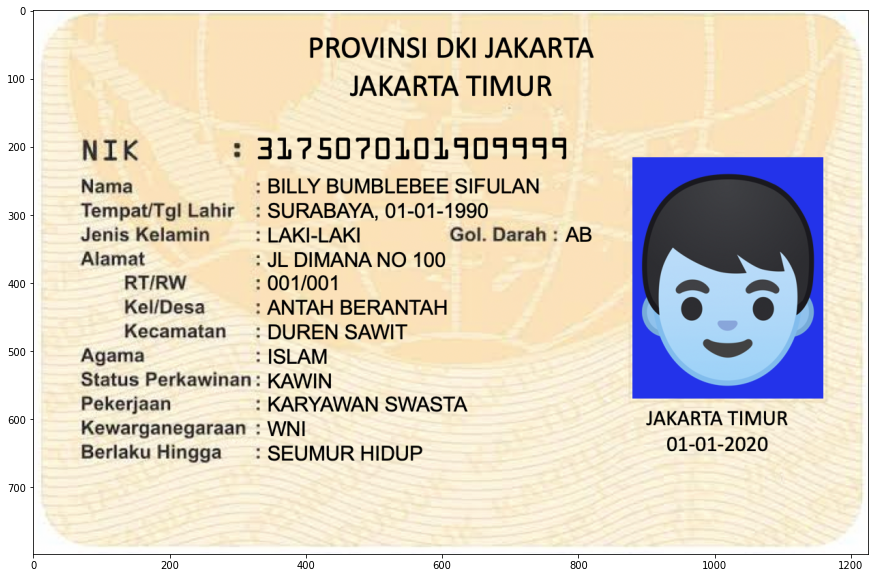

In [15]:
image = cv2.imread("/content/drive/MyDrive/Bangkit/sample_ktp.png")
plt.figure(figsize = (40,10))
plt.imshow(image)

#**Pre-Processing Image**

1. Convert image to 1D

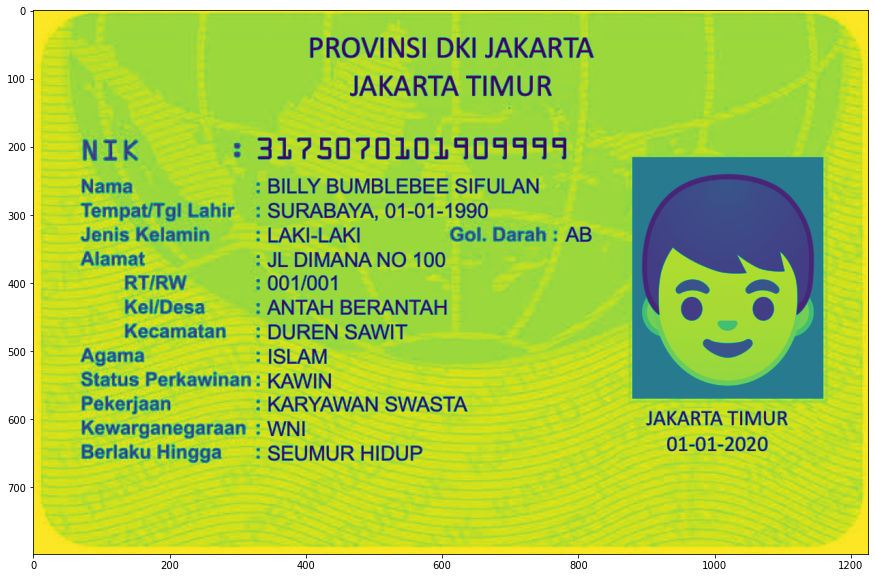

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (40,10))
plt.imshow(gray)

2. Convert into black and white

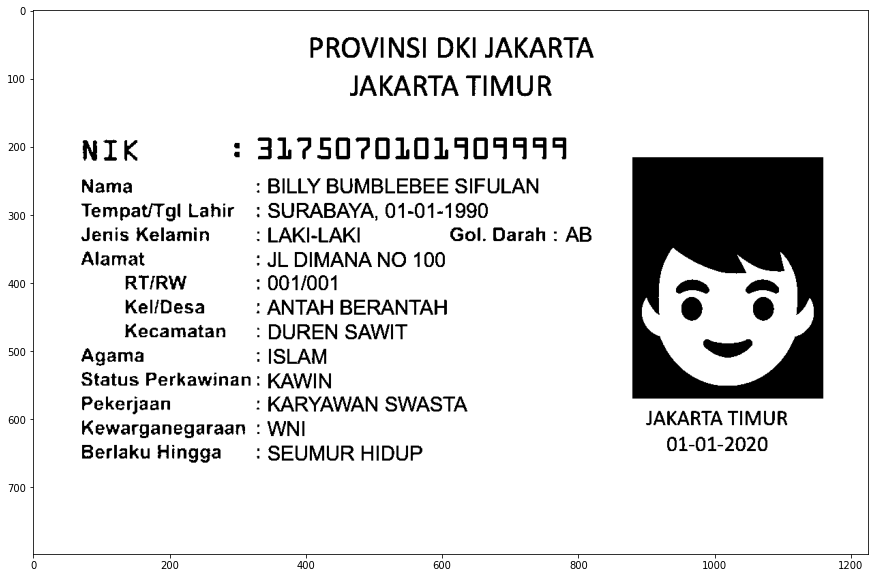

In [17]:
thresh = 127
blackWhite = cv2.threshold(gray,thresh,255,cv2.THRESH_BINARY)[1]
plt.figure(figsize = (40,10))
plt.imshow(blackWhite, cmap="gray")

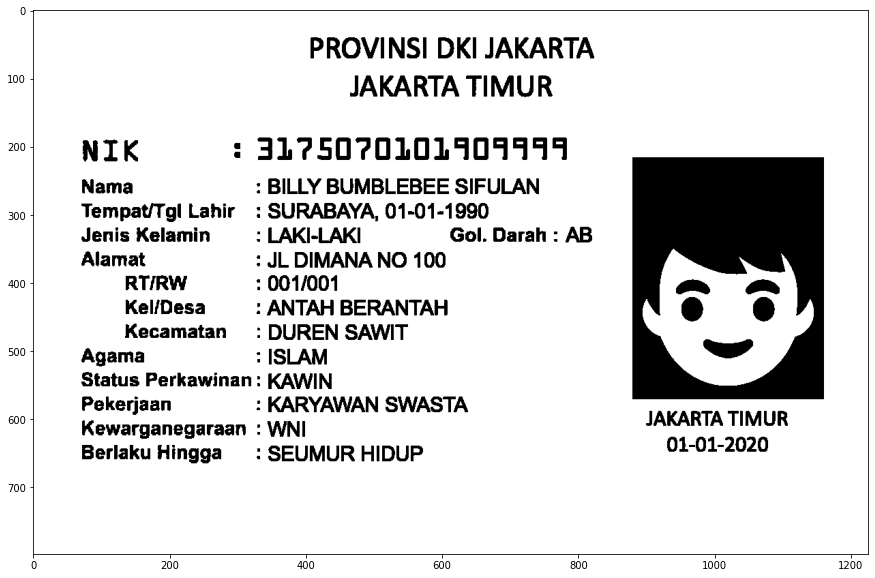

In [18]:
kernel = np.ones((2,2), np.uint8)

img_erosion = cv2.erode(blackWhite, kernel, iterations=1)
plt.figure(figsize = (30,10))
plt.imshow(img_erosion, cmap="gray")

# **Get text from image**

In [19]:
data = pytesseract.image_to_data(img_erosion, output_type='data.frame')
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1226,798,-1,NaN
1,2,1,1,0,0,0,407,40,416,31,-1,NaN
2,3,1,1,1,0,0,407,40,416,31,-1,NaN
3,4,1,1,1,1,0,407,40,416,31,-1,NaN
4,5,1,1,1,1,1,407,40,170,31,91,PROVINSI
...,...,...,...,...,...,...,...,...,...,...,...,...
92,3,1,7,1,0,0,72,602,327,27,-1,NaN
93,4,1,7,1,1,0,72,602,327,27,-1,NaN
94,5,1,7,1,1,1,72,602,240,27,91,Kewarganegaraan
95,5,1,7,1,1,2,329,608,4,15,92,:


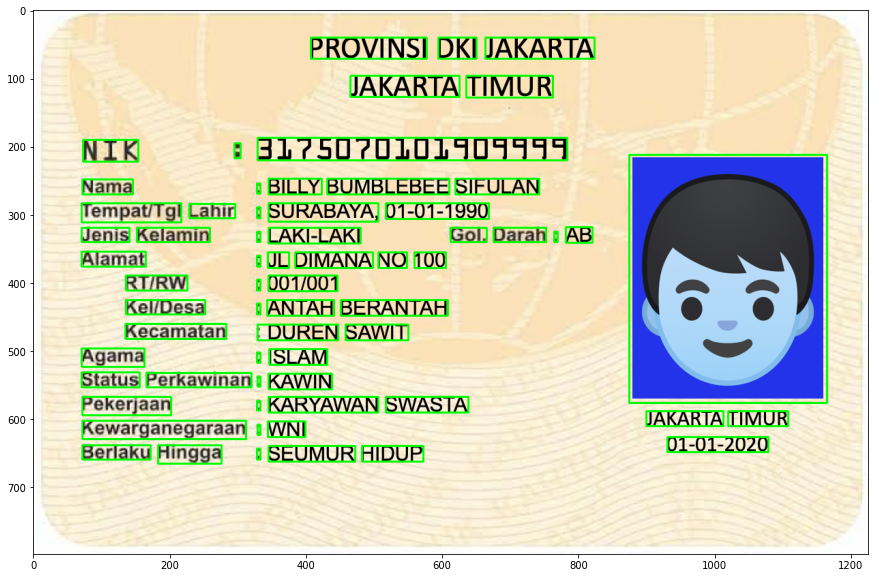

In [20]:
for box in range(len(data)):
  if data["conf"][box] >= 0:
    image = cv2.rectangle(image, (data['left'][box], data['top'][box]), 
                          (data['left'][box]+data['width'][box], data['top'][box]+data['height'][box]), 
                          (0,255,0),2)

plt.figure(figsize = (40,10))
plt.imshow(image)

In [21]:
result = pytesseract.image_to_string(img_erosion)
print(result)

PROVINSI DKI JAKARTA

JAKARTA TIMUR
NIK : 3475070101909995
Nama : BILLY BUMBLEBEE SIFULAN
Tempat/Tgl Lahir : SURABAYA, 01-01-1990
Jenis Kelamin : LAKI-LAKI Gol. Darah : AB
Alamat : JL DIMANA NO 100

RTIRW : 001/001
Kel/Desa : ANTAH BERANTAH
Kecamatan :DUREN SAWIT

 

Agama : ISLAM
Status Perkawinan : KAWIN
Pekerjaan : KARYAWAN SWASTA

JAKARTA TIMUR
Berlaku Hingga =: SEUMUR HIDUP 01-01-2020

Kewarganegaraan : WNI

